# Calibrating dispersal

## Contents

[Mucking around with exponential curves](#expCurves)


[Calibrating sporulation](#realData)

[Calibrating leaf fall](#leafFall)

[Some notes about woody substrates](#woody)

<a id='expCurves'></a>
## Mucking around with exponential curves

We'll take a look at using a negative  our spore dispersal using an [natural] exponential curve, which [Galante et al.](http://www.tandfonline.com/doi/full/10.3852/10-388) found useful for describing spore concentrations from a mushroom. 

In [36]:
from sympy import symbols
from sympy.plotting import plot
from sympy import exp, ln
import matplotlib.pyplot as plt
import math 
%matplotlib inline

In [3]:
x  = symbols('x')

In [35]:
s = plot(exp(-0.5*x), line_color='Purple', ylim=(0,1), xlim=(0,15))
t = plot(exp(-1.0*x), line_color='Green', ylim=(0,1), xlim=(0,15))
u = plot(exp(-2*x), line_color='Blue', ylim=(0,1), xlim=(0,15))
v = plot(exp(-4*x), line_color='Red', ylim=(0,1), xlim=(0,15))

s.extend(t);s.extend(u);s.extend(v)
s.legend = True

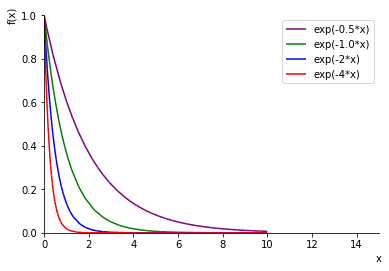

In [36]:
s.show()

Some very simple things to notice here. One convenient fact is that all exponential curves with a negative coefficient go to the asymptote of zero when distance is great, and to 1 when distance is very small, because any real number taken to the 0-th power is 1. The negative exponential functions approximate what we see in nature very well, high probability-of-infection/high spore numbers close to a source, with a long tail of few, but well-dispersed spores at longer distances. 

If we write this function with a dispersal ('D') coefficient, it looks like this: 

\begin{equation*}
f(x)   =  e^{-Dx}
\end{equation*}

When a fungus is well-dispersed (many small spores well ejected from a sporocarp), we give it a small value, and when the opposite is true, we'll give in a high value. In the above diagram, the purple fungus is well-dispersed, it has a small D value, D=0.5. The red fungus is poorly dispersed, D=4. 

Given this, it may be more convenient to use the additive inverse of D as a parameter on the model, so that we are working with positive numbers. And the multiplicative inverse (the reciprocal), so that magnitudes of our dispersal coefficient will correlate with number-of-spores/probability-of-infection. In this way, for instance, at a distance of one unit, a dispersal coefficient of five gives a greater probability of infection  than 2:


\begin{equation*}
f(x) = e^{\frac{-1}{d}x}
\end{equation*}

\begin{equation*}
f(5)   =  e^{(\frac{-1}{5})(1)}    = 0.82
\end{equation*}

\begin{equation*}
f(2)   =  e^{(\frac{-1}{2})(1)}    = 0.61
\end{equation*}

Let's code our plot in pyplot to reflect this:

In [71]:
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

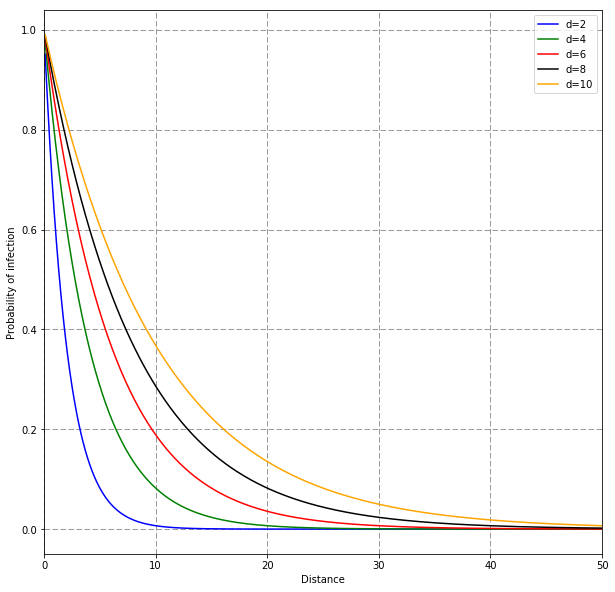

In [74]:
d = 10
cls = ['b','g','r','k','orange']
x = [ i/10 for i in range(1,1001,1) ] ## 1 to 1000
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim([0,50]) 
for j in range(2,d+1,2):
    y = [ exp((-1/j)*i) for i in x ]
    ax.plot(x,y,
            color=cls[int(j/2-1)],
            label=('d=%s' %j),
            )

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel("Distance")
ax.set_ylabel("Probability of infection")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

This is a little confusing, because we don't have meters on the x-axis. We just have some abstract distance unit.

So as far as our model landscape, which is trying to be a 1 ha (100 m<sup>2</sup>) plot, each cell is 1 m by 1 m. That means each unit on the x-axis of this plot represents 1 meter. Does this make sense? We can explore some real data to check this. 

<a id='realData'></a>
## Calibrating sporulation

We know that under the set of conditions that we're using right now for our model runs, a fungus with d=5 can persist fairly well on the landscape (though far from 100% of runs). In the above figure, we see that the likelihood of infection by fungi with d=4 (green) goes to zero somewhere around 20 distance-units, or 200 m. For fungi with d=6 (red), zero happens maybe around 300 meters. How does this compare with real data? 

One good study to use here is [Norros et al. (2012)](http://onlinelibrary.wiley.com/doi/10.1111/j.1600-0706.2012.20052.x/full). They placed cultures of monokaryons of a rare basidiomycete at increasing distances from point sources of spores (sporocarps), and checked frequency/probability of a compatible mating event, as evidenced by formation of clamp connections. 

Here is one figure of some of their results:

<img src='graphics/norros.png'>

Notice that probability of infection drops off quickly (x-axis is sort of log-transformed), is very low in the 400-1000 m range (though not zero!). Compared to the above, d=5 is actually pretty conservative, we might expect to see something closer to d=10 or higher. Something to think about as we run our models, but also worth noting that this method of detecting spores is not quite a complete measure of successful establishment - successful inocculation of woody substrates by a fungus will probably be much more  difficult than acceptance of a spore by known compatible strain of monokaryon mycelium. But let's look at some higer dispersal settings:

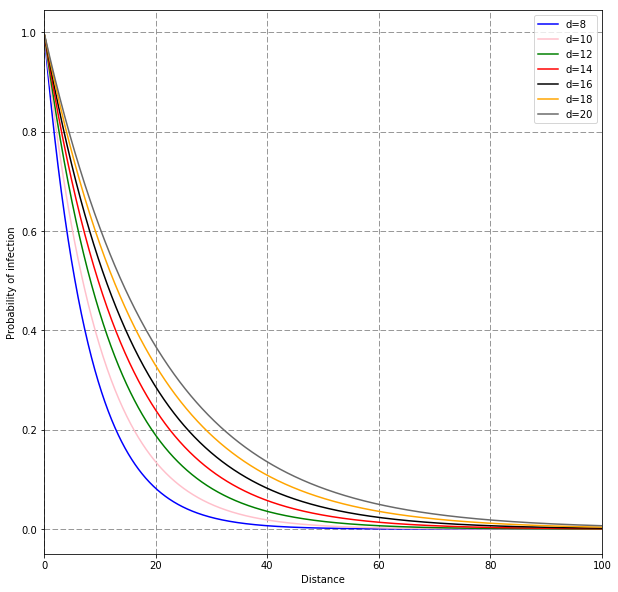

In [79]:
cls = ['b','pink','g','r','k','orange','dimgray']
x = [ i/10 for i in range(1,1001,1) ] ## 1 to 1000
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim([0,100]) 
for j in range(8,22,2):
    y = [ exp((-1/j)*i) for i in x ]
    ax.plot(x,y,
            color=cls[int((j-8)/2)],
            label=('d=%s' %j),
            )

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel("Distance")
ax.set_ylabel("Probability of infection")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')


The Norros' data might best be fit with the d=12 curve, or higher. But again, colonization success is probably lower than the mating success event represented in the Norros paper. We can contrast this with results from two other studies. [Galante et al. (2011)](http://dx.doi.org/10.3852/10-388) used microscopy to quantify spore deposition at increasing distances from individual ectomycorrhizal mushrooms, in the field. [Peay et al. 2012](http://onlinelibrary.wiley.com/wol1/doi/10.1111/j.1365-294X.2012.05666.x/full) used qpcr and sterile seedlings to look at the effect of distance from a "mainland" forest, interpreting their results in an island biogeography theoretical framework. 

Galante reported that the vast majority of spores from an individual sporocarp don't make it very far:

<img src='graphics/galante.png'>

If we were to go just on this, our fungi would have a very low dispersal coefficient (d < 1?). In contrast, Peay reports: 

<img src='graphics/peay.png'>

Filled and empty circles represent different sampling years. One of the interesting results that this figure shows is that fungi are varying dramatically in their spore loads across space and their success at colonization of substrates at varying distances. *Suillus* and *Thelophora* are much more aggressive than *Tomentella* in their dispersal, sometimes colonizing 100% of substrates at 100 m. *Tomentella*, however, drops to ~0 by 100m, despite being the third-most common EM sporocarp in the nearby forest. It's important to remember that these studies show different scales of sources of spores: Norros is measuring from a sporulation event of two logs with sporocarps, Galante is measuring the spore release from a single sporocarp, and Peay is measuring the the edge of a large pine forest, presumably a vast source of spores. 

We can assume that the *Suillus* and  *Thelophora* species given in Peay (2012) are somewhere in the very-aggressive category of dispersal, since they are the most common and are giving off massive numbers of spores. Note however, that Galante (2011) did look at a *Suillus* and a *Thelophora* species (not the same species) in their measurements, and still found the same evidence for tight dispersal limitation. Just as interesting, *Tomentella* doesn't seem to be an aggressive spore disperser, but is doing just fine on the landscape, being one of the three most common EM sporocarps in the local forest.

So the lesson here seems to be that all kinds of dispersal strategies exist for fungi. Where does that leave us as far as calibrating our model? For our standard EC- fungus let's use something like the sporulation events in the Norros data but with a bit of a handicap to account for the difficulties of colonizing wood, or something like *Thelophora* species in the Peay data. Our dispersal probability functions are not perfect for modeling this, but we can estimate this at d = 10.  

<a id='leafFall'></a>
## Calibrating leaf fall

This also informs our calibration of leaf dispersals in the model. Roo collected fresh leaves from different distances around two trees in the area of the study. According to Roo's data, leaf fall at Los Cedros from these two canopy trees also resembled some sort of exponential decay:

<img src='graphics/fallenleaves.png'>

Not going to try to fit a model to this, this has been done elsewhere with much more complete datasets [(Ferrari and Sugita 1997)](https://doi.org/10.1139/x26-215). But the curves drawn above are suggestive that our trees also deposit their leaves in a way that is well described by an exponential decay function. For the purposes of roughly calibrating our model, most leaf deposition zeroes out around 25 or 30 meters, and the vast majority of the leaves fall within 10 m. Thus we might start by assigning a dispersal value of d=4 to trees. There are some assumptions in this - mainly that wood deposited under an endophyte-infected tree will have a 100% chance of being inocculated by those endophytes. 

Is it exagerating to say that a log under a tree whould have a 100% infection probability from endophytes in leaves? We know very little about the chance of success of establishment of mycelium in wood from an endophyte-infected leaf, though we know it is possible and we have argued that it might be enhanced in some ways over spore-to-wood inocculations. Under lab conditions, Aaron and Roo have shown that all of the 12 leaves we collected from Los Cedros transmitted fungi to wood. Leaves from the overhead tree create significant litter cover, completely covering the ground beneath the tree several times over (per m<sup>2</sup> of ground, 4.27 m<sup>2</sup> of leaf area dropped per year). So in the forest that is at roughly the same elevation as our model system, assuming ~even year-round leaf fall rates, the ground is completely covered with new leaves every 3 months time-step in our model, ([Veneklaas, 1991](http://www.jstor.org/stable/2559629)). All of those leaves contain endophytes, viaphytic or not. And these moist tropical trees are losing their leaves continuously throughout the year. So maybe this an  imperfect but not-unreasonable approximation. And since logs can be shared in our model by different fungi, so inoculation by an endophyte doesn't preclude inoculation and competition from aggressive fungal dispersers.

<a id='woody'></a>
## Some notes about woody debris fall, and the limits of the model...

Since we've assigned the cost of sporulation to be 4, it seems reasonable to say that a time step here is 3 months. Thus a fungus, if all is going well, will sporulate ~once per year. According to [Veneklaas (1991)](http://www.jstor.org/stable/2559629), a mid-elevation cloud forest can deposit ~7 tons (dry weight) of woody debris per hectare per year, specifically excluding coarse woody debris. Chambers et al report that 30% of litter is coarse woody debris, when it is not excluded from sampling ([Chambers 2000](https://link.springer.com/article/10.1007%2Fs004420050044?LI=true)), so we can estimate that ~300 kg of woody debris are dropped onto the Cloud forest floor every year, or 75 kg (dry weight) per time-step of our model. 

I have no idea what it costs in cellulose to make a sporocarp or a sporulation event. This is way beyond what I want to try to answer with this model, but we need some sort of calibration of our wood deposition rates. Let's do some more napkin calculations. 

Even in the tropics, many fungi sporulate once a year, on large pieces of woody debris, while respiring perhaps 15% of the mass of the woody debris on a landscape ([Chambers 2001](https://link.springer.com/article/10.1023/A:1006473530673)). Just from personal experience, I saw many sizes classes of CWD on the forest floor, ranging from sticks to full-grown fallen tree trunks. Let's say that a 5 kg piece of wood is the smallest I think I saw any charismatic, large sporocarp on (*Mycenas* and cup fungi will sporulate on much less, but we've got to simplify somewhere!). Let's say it took them 1 year to accumulate the biomass to sporulate, in the meantime using up %15 of 5 kg of wood, or 0.75 kg wood for a minimum sporulation event.  This isn't too far from the estimates of biomass that home mushroom growing sites sometimes give for fungi, for instance [here](#http://freshcapmushrooms.com/learn/the-fruiting-block-growing-gourmet-mushroom-on-sawdust/), where ~5 lbs of substrate (wet sawdust) is used for a block of oyster mushroom mycelium. But this is a relatively small piece of wood, and hence a small sporulation event that might resemble the kind of event modeled by Galante. So let's estimate 4 kg as the amount of wood needed to give a fungus enough energy to create a big sporulation event.

So, how many pieces of on 1 ha and how much energy in them? In this model we make this a stochastic process, varying the size and number of wood pieces dropped on the forest floor per step, but always having the total energy in wood dropped onto the landscape from the canopy sum to close to ~75. That's 

My hands are sore from all the waving...there is a problem with all of this - computing power and model simplicity are quickly limiting. Modeling wood deposition with this much energy, and leaf fall from this many  trees is probably untenable. The main issue is the amount of agents creating by realistic tree cover (~600 trees/ha), and the amount of energy in the system represented by woody debris creating a LOT of fungal agents, and the costs of all of these agents interacting at each step. If we try to model these as above, it seems to overwhelm whatever node I'm on. This is a testement to the complexity and abundances of nature, for sure. 

A large part of the issue is my inefficient coding, but I'm not hiring a professional python programmer any time soon. And there is the old medawar zone...I don't think much information is lost if I don't saturate the landscape with wood.
